In [1]:
import sys
sys.path.append("..")

In [2]:
import mxnet as mx
from matplotlib import pyplot as plt
from data_loaders.cifar10 import Cifar10
from data_loaders.mixup import MixupLoader

In [3]:
%matplotlib inline

In [23]:
def inspect_dataloader(dataloader, n_samples=5):
    """
    :param stage: str, 'train' or 'test'
    :param n_samples: number of images to sample
    :param idx: int, index of image to slice out of batch
    :return: None, just plots
    """
    counter = 0
    try:
        for data_batch, label_batch in dataloader:
            batch_size = data_batch.shape[0]
            for sample_idx in range(batch_size):
                label_data = label_batch[sample_idx]
                print(label_data)
                sample_data = data_batch[sample_idx]
                sample_data = sample_data.transpose((1, 2, 0)).asnumpy()
                print("Max value: {}".format(sample_data.max()))
                print("Min value: {}".format(sample_data.min()))
                plt.imshow(sample_data)
                plt.show()
                counter = counter + 1
                if counter >= n_samples:
                    raise StopIteration
    except StopIteration:
        pass
    
    
def transform(data, label):
    data = data.transpose(axes=(2,0,1))
    data = data.astype('float32')
    data = data/255
    return data, label
train_data_set = mx.gluon.data.vision.CIFAR10(train=True, transform=transform)
batch_size = 10
train_data_loader = mx.gluon.data.DataLoader(train_data_set, batch_size=batch_size, shuffle=True)
# inspect_dataloader(train_data_loader)


[ 0.          0.          0.          0.53025734  0.          0.          0.
  0.          0.46974263  0.        ]
<NDArray 10 @cpu(0)>
Max value: 0.8801606893539429
Min value: 0.04990657418966293


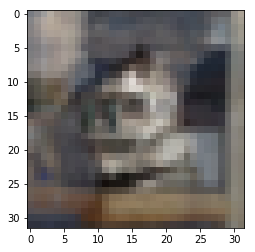


[ 0.          0.          0.          0.          0.54347777  0.          0.
  0.          0.45652226  0.        ]
<NDArray 10 @cpu(0)>
Max value: 0.8666667938232422
Min value: 0.08448423445224762


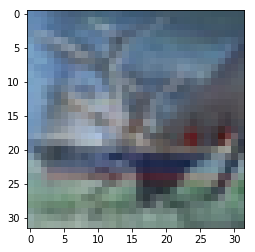


[ 0.         0.         0.4275136  0.5724864  0.         0.         0.         0.
  0.         0.       ]
<NDArray 10 @cpu(0)>
Max value: 0.7950575351715088
Min value: 0.14327633380889893


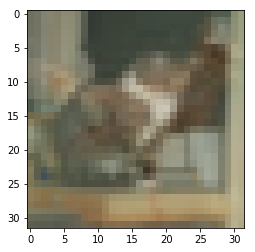


[ 0.          0.46055239  0.          0.          0.          0.          0.
  0.          0.          0.53944761]
<NDArray 10 @cpu(0)>
Max value: 0.750005841255188
Min value: 0.037409599870443344


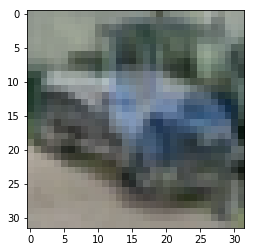


[ 0.          0.          0.          0.54345691  0.          0.          0.
  0.          0.45654312  0.        ]
<NDArray 10 @cpu(0)>
Max value: 1.0
Min value: 0.17255288362503052


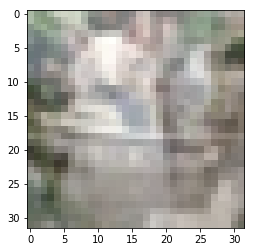

In [27]:
mixup_dataloader = MixupLoader(train_data_loader, num_classes=10, alpha=123)
inspect_dataloader(mixup_dataloader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 7.]
<NDArray 1 @cpu_pinned(0)>
Max value: 184.58323669433594
Min value: -93.56219482421875


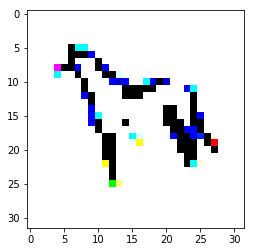

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 6.]
<NDArray 1 @cpu_pinned(0)>
Max value: 186.3739776611328
Min value: -91.81097412109375


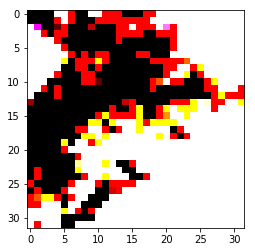

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 9.]
<NDArray 1 @cpu_pinned(0)>
Max value: 211.3275909423828
Min value: -117.96521759033203


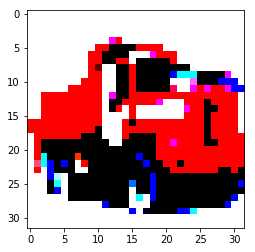

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 7.]
<NDArray 1 @cpu_pinned(0)>
Max value: 219.79263305664062
Min value: -118.85279846191406


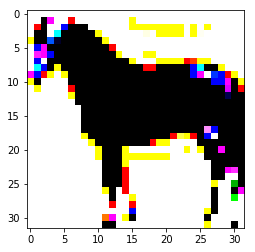

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 2.]
<NDArray 1 @cpu_pinned(0)>
Max value: 205.0884552001953
Min value: -121.6868896484375


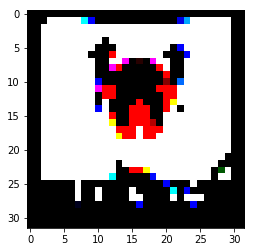

In [20]:
train_data_loader, valid_data_loader = Cifar10(batch_size=batch_size,
                                      data_shape=(3, 32, 32),
                                      padding=0,
                                      padding_value=0,
                                      normalization_type="pixel").return_dataloaders()
inspect_dataloader(train_data_loader)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 0.  0.  0.  0.  0.  0.  0.  1.  0.  0.]
<NDArray 10 @cpu(0)>
Max value: 170.5509796142578
Min value: -97.33456420898438


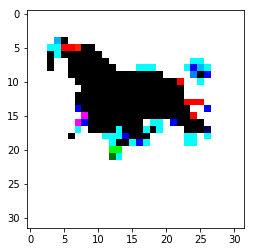

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 0.          0.          0.53552175  0.          0.          0.          0.
  0.46447825  0.          0.        ]
<NDArray 10 @cpu(0)>
Max value: 147.122314453125
Min value: -80.9244384765625


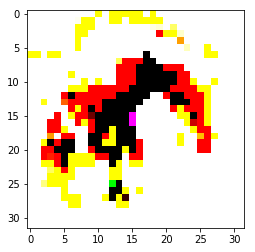

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 0.          0.          0.          0.          0.          0.          0.
  0.          0.5037843   0.49621567]
<NDArray 10 @cpu(0)>
Max value: 174.63919067382812
Min value: -66.81585693359375


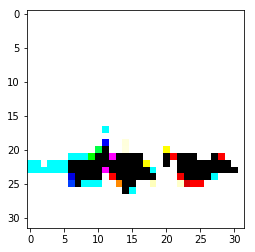

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 0.          0.          0.46313971  0.          0.          0.          0.
  0.53686029  0.          0.        ]
<NDArray 10 @cpu(0)>
Max value: 144.95858764648438
Min value: -90.792236328125


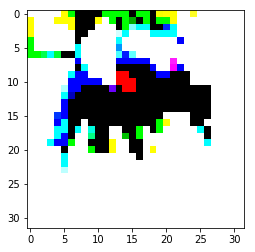

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).



[ 0.  0.  0.  0.  0.  0.  0.  0.  0.  1.]
<NDArray 10 @cpu(0)>
Max value: 155.51718139648438
Min value: -79.47512817382812


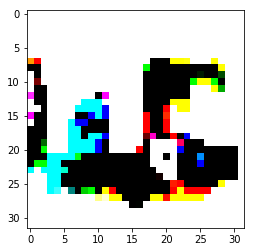

In [21]:
mixup_dataloader = MixupLoader(train_data_loader, num_classes=10, alpha=123)
inspect_dataloader(mixup_dataloader)

In [44]:
true = mx.nd.array([[0, 1],[0.5, 0.5],[0.25, 0.75]])
# true = mx.nd.array([1, 1, 0])
pred = mx.nd.array([[-3, 3], [3, 3], [3, 2]])

In [45]:
criterion = mx.gluon.loss.SoftmaxCrossEntropyLoss(sparse_label=False)

In [46]:
criterion(pred, true)


[ 0.00247565  0.69314718  1.06326163]
<NDArray 3 @cpu(0)>

In [ ]:

[[-0.51003683 -0.52630955  0.39496025 ..., -0.47732782 -1.37555826
  -0.45022315]
 [-0.50343007  0.66607726 -0.79413152 ...,  0.75142807 -0.56878233
   2.18101549]
 [ 0.96378011  0.98279899 -0.75270921 ...,  0.00409169  1.14155912
   0.2449162 ]
 ..., 
 [-2.03431606 -2.0455718   1.32638478 ...,  0.24634898 -2.77375984
  -2.25844955]
 [-1.6924721   1.19551313 -0.64653122 ..., -0.70628333 -1.26219904
   0.39810377]
 [ 0.88909149  1.49668431 -0.02579039 ..., -1.38114226  1.29671013
  -0.47562397]]
<NDArray 512x10 @gpu(2)>